# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [11]:
import os
import glob
import pandas as pd
os.chdir("datasets") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [14]:
extension = 'csv'
csv_files = glob.glob(f'*{extension}')

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [18]:
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
#Export to csv
df.to_csv("csv_files.csv")

#### To-Do -Read the CSV file using `pd.read_csv` method

In [20]:
dfc = pd.read_csv("csv_files.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [145]:
dfc.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2024-12-26 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2024-12-26 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2024-12-26 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2024-12-26 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2024-12-26 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [28]:
dfc.shape

(1000, 18)

#### To-Do - Generate the names of the columns using the columns attribute.

In [30]:
dfc.columns

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [38]:
dfc.describe

<bound method NDFrame.describe of      Unnamed: 0   Invoice ID Branch           City Customer type  Gender  \
0             0  692-92-5582      B          Abuja        Member  Female   
1             1  351-62-0822      B          Abuja        Member  Female   
2             2  529-56-3974      B          Abuja        Member    Male   
3             3  299-46-1805      B          Abuja        Member  Female   
4             4  319-50-3348      B          Abuja        Normal  Female   
..          ...          ...    ...            ...           ...     ...   
995         995  148-41-7930      C  Port Harcourt        Normal    Male   
996         996  189-40-5216      C  Port Harcourt        Normal    Male   
997         997  267-62-7380      C  Port Harcourt        Member    Male   
998         998  652-49-6720      C  Port Harcourt        Member  Female   
999         999  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    

#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary
- There is a total of 1000 rows and 18 columns
- There seem to be more goods sold on cash than other forms of payment
- The higher the rating of a good, the higher the income

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [48]:
dfc.isnull().sum()
dfc.notna().sum()
dfc.notnull().sum()

Unnamed: 0                 1000
Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [50]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [57]:
dfc["Date"] = pd.to_datetime(dfc["Date"])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [55]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

#### To-Do - Repeat the two steps above to the `time` column

In [61]:
dfc["Time"] = pd.to_datetime(dfc["Time"])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [63]:
Day = dfc["Date"].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [65]:
Month = dfc["Date"].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [67]:
Year = dfc["Date"].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [75]:
Hour = dfc["Time"].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [ ]:
dfc['Time'].dt.hour.nunique()

In [79]:
dfc['Time'].dt.hour.unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20])

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [212]:
#Uncomment the code and Run it
categorical_columns = [col for col in dfc.columns if dfc[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [214]:
#Example - Uncomment the Code and Run it
dfc['Branch'].unique().tolist()

['B', 'A', 'C']

In [216]:
print("Total Number of unique values in the Branch Column : {}". format(len(dfc['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [218]:
dfc['Invoice ID'].unique().tolist() #Getting unique invoice IDs
print("Total Number of unique values in the Invoice ID Column : {}". format(len(dfc['Invoice ID'].unique().tolist())))

dfc['City'].unique().tolist() #Getting unique City
print("Total Number of unique values in the City Column : {}". format(len(dfc['City'].unique().tolist())))

dfc['Customer type'].unique().tolist() #Getting unique Customer type
print("Total Number of unique values in the Customer type Column : {}". format(len(dfc['Customer type'].unique().tolist())))

dfc['Gender'].unique().tolist() #Getting unique Gender
print("Total Number of unique values in the Gender Column : {}". format(len(dfc['Gender'].unique().tolist())))

dfc['Product line'].unique().tolist() #Getting unique Product line
print("Total Number of unique values in the Product line Column : {}". format(len(dfc['Product line'].unique().tolist())))

dfc['Date'].unique().tolist() #Getting unique Date
print("Total Number of unique values in the Date Column : {}". format(len(dfc['Date'].unique().tolist())))

dfc['Time'].unique().tolist() #Getting unique Time
print("Total Number of unique values in the Time Column : {}". format(len(dfc['Time'].unique().tolist())))

dfc['Payment'].unique().tolist() #Getting unique Payment
print("Total Number of unique values in the Payment Column : {}". format(len(dfc['Payment'].unique().tolist())))



Total Number of unique values in the Invoice ID Column : 1000
Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique values in the Gender Column : 2
Total Number of unique values in the Product line Column : 6
Total Number of unique values in the Date Column : 89
Total Number of unique values in the Time Column : 506
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [220]:
#Example
dfc['City'].value_counts()

dfc['Invoice ID'].value_counts()
dfc['Customer type'].value_counts()
dfc['Gender'].value_counts()
dfc['Product line'].value_counts()
dfc['Date'].value_counts()
dfc['Time'].value_counts()
dfc['Payment'].value_counts()

Payment
Epay    345
Cash    344
Card    311
Name: count, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [228]:
city_group_by = dfc.groupby("City")

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [230]:
city_group_by['gross income'].sum()

City
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
Name: gross income, dtype: float64

In [232]:
city_group_by['gross income'].max()

City
Abuja            17528.4
Lagos            17816.4
Port Harcourt    17874.0
Name: gross income, dtype: float64

In [ ]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

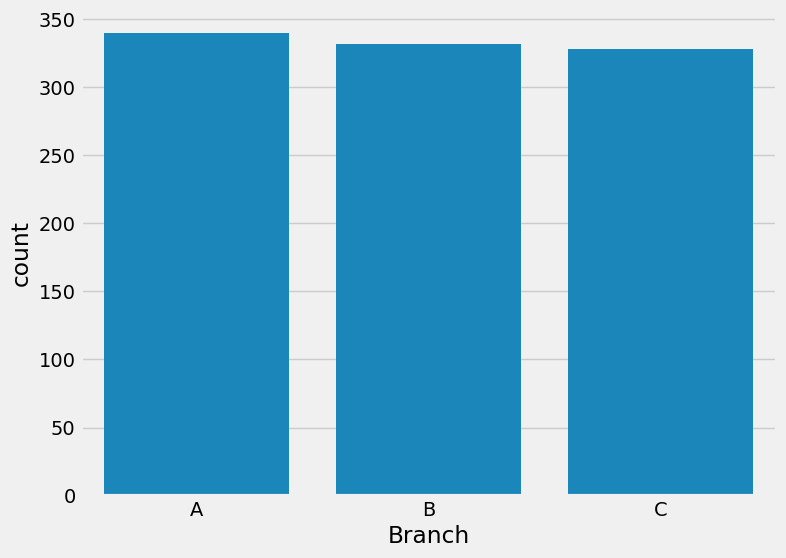

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dfc, x='Branch', order=dfc['Branch'].value_counts().index)
plt.show()

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

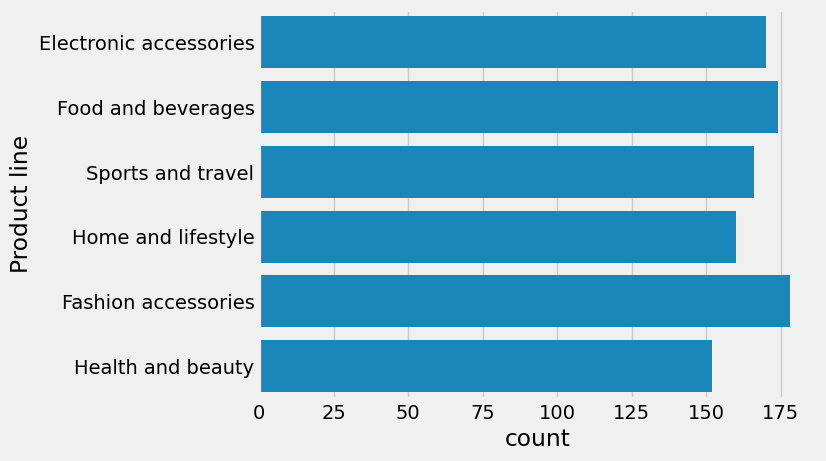

In [242]:
sns.countplot(data=dfc, y='Product line', order=dfc.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).index)
plt.show()

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

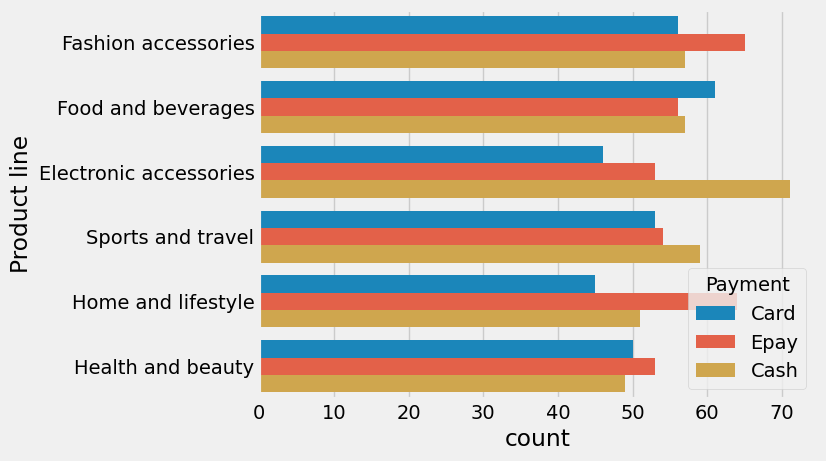

In [244]:
sns.countplot(data=dfc, y='Product line', hue='Payment', 
              order=dfc['Product line'].value_counts().index)
plt.show()

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

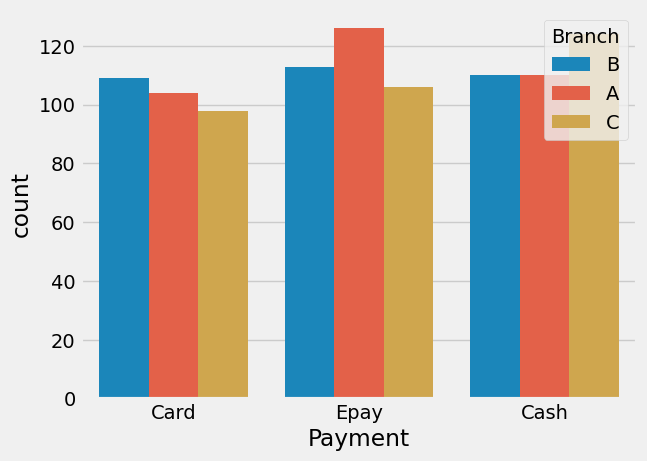

In [250]:
sns.countplot(data=dfc, x='Payment', hue='Branch')
plt.show()

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

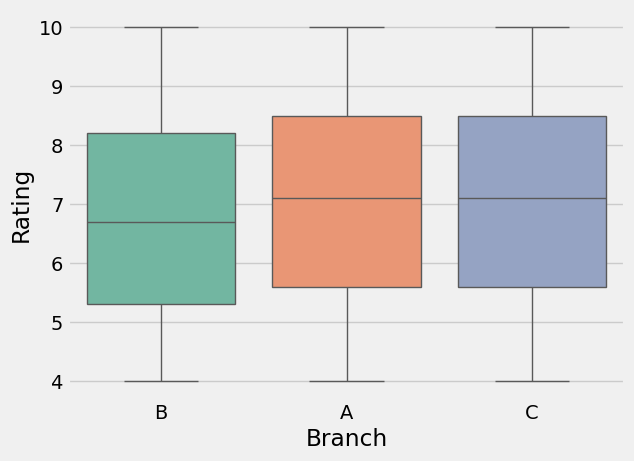

In [252]:
sns.boxplot(data=dfc, x='Branch', y='Rating', palette="Set2")
plt.show()

In [181]:
###The branch with the lowest rating is Branch B

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

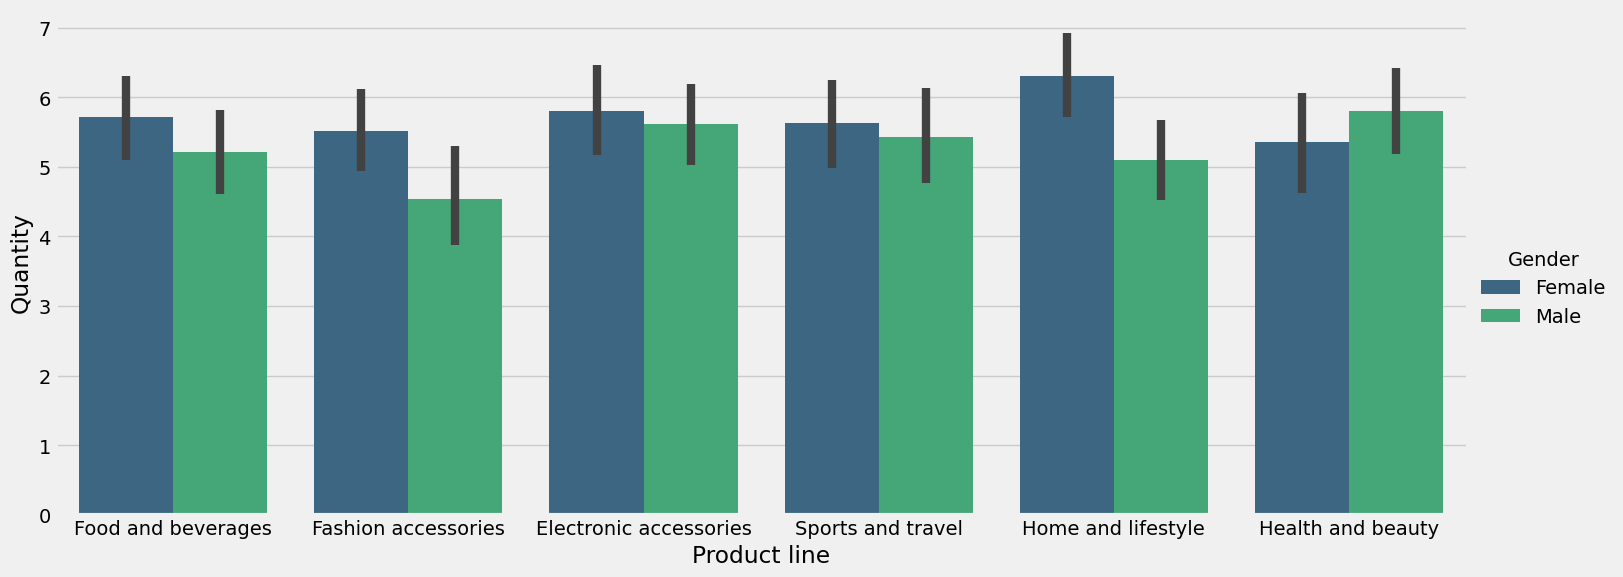

In [254]:
sns.catplot(data=dfc, x='Product line', y='Quantity', hue='Gender', kind='bar', height=6, aspect=2.5, palette="viridis")
plt.show()

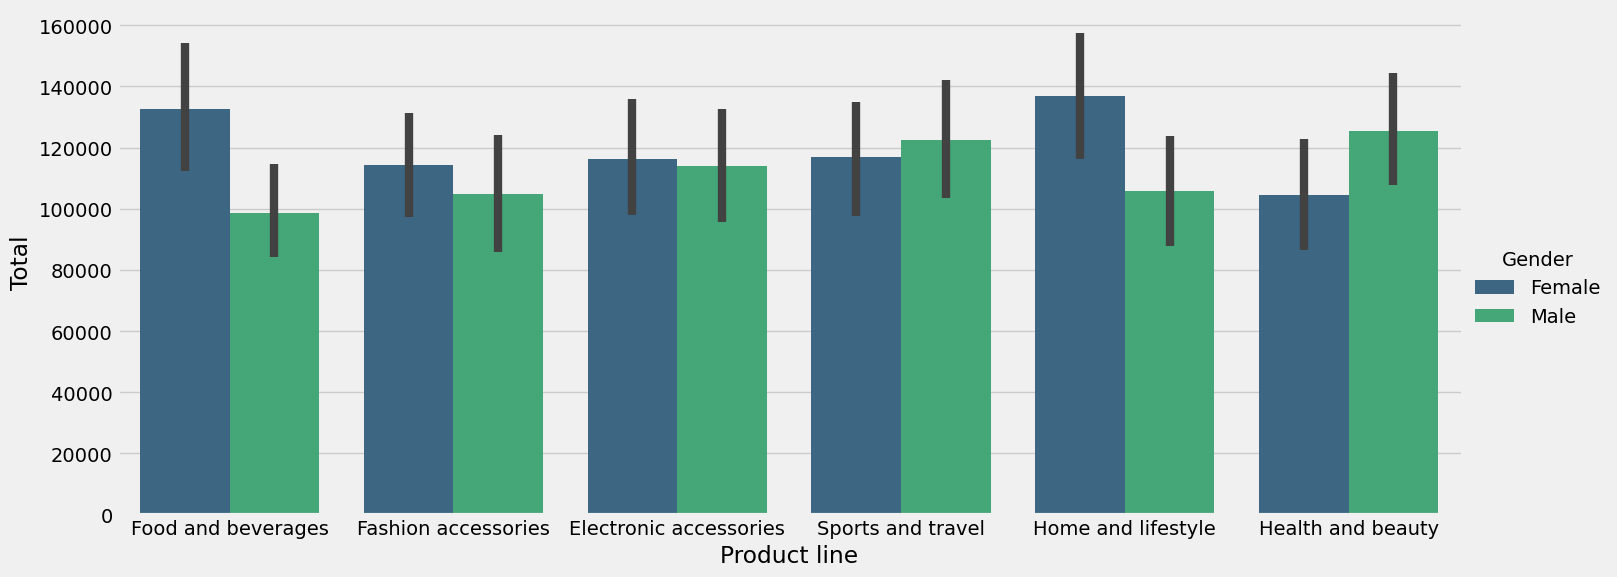

In [256]:
sns.catplot(data=dfc, x='Product line', y='Total', hue='Gender', kind='bar', height=6, aspect=2.5, palette="viridis")
plt.show()

### My summary
- Men seem to buy more Health and beauty products than women
- Men also top in  the Sport and travel category

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

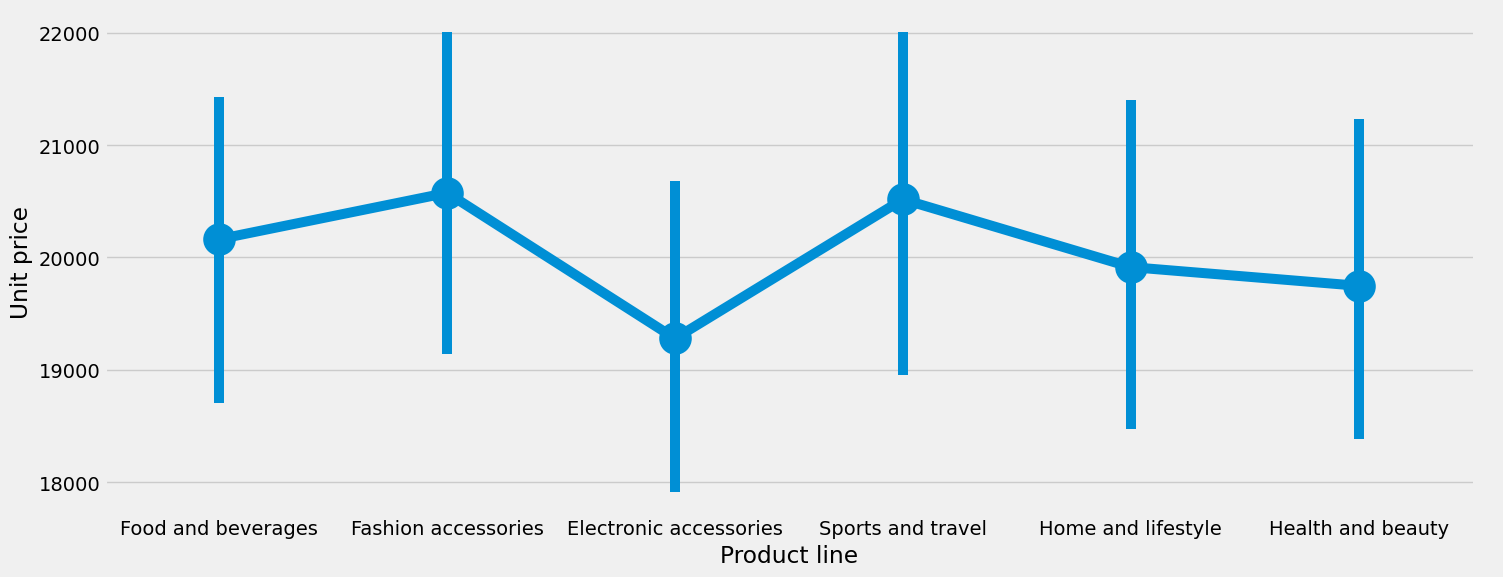

In [258]:
sns.catplot(data=dfc, x='Product line', y='Unit price', kind='point', height=6, aspect=2.5)
plt.show()

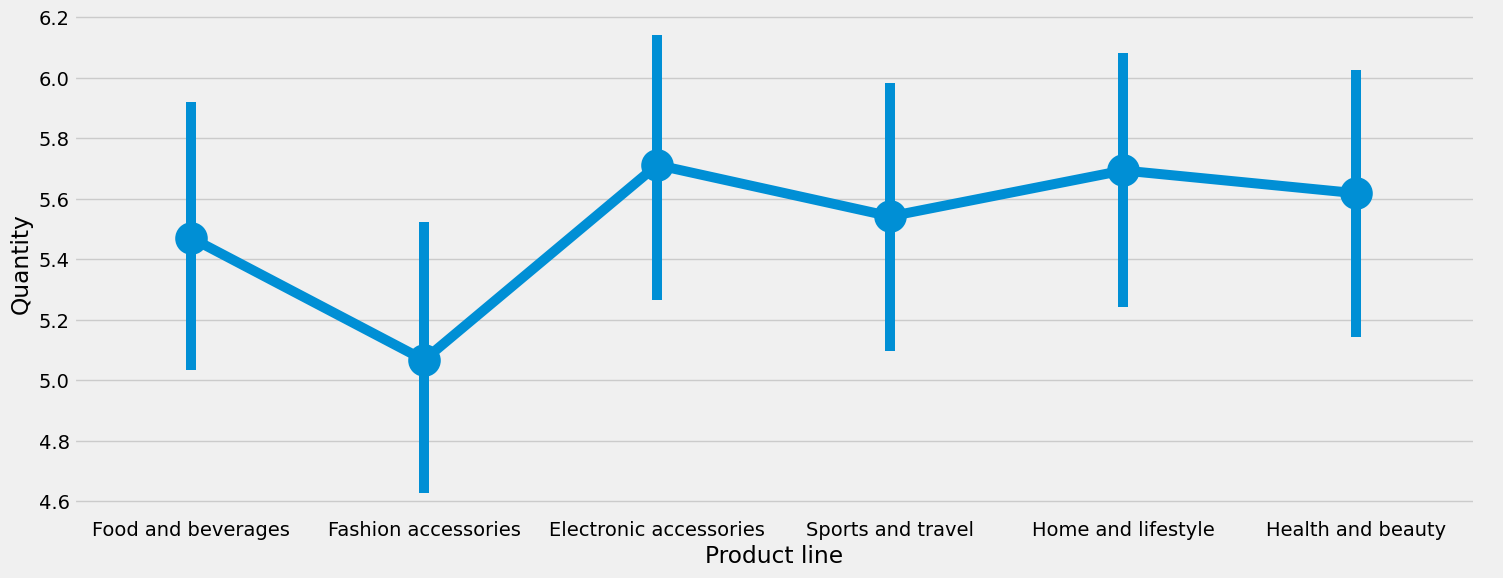

In [260]:
sns.catplot(data=dfc, x='Product line', y='Quantity', kind='point', height=6, aspect=2.5)
plt.show()

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 